## Growth in a test tube
This simple example illustrates the basic workflow of COMETS, including how to build the simulation layout, to specify parameters, load the model and plot the data once the simulation is finished.

The core of the COMETS methodology is the Dynamic Flux Balance Analysis algorithm (Madahevan et al 2002). One of the first successful simulations of the time dynamics of bacterial metabolism was the classical study of *Escherichia coli* batch culture by Varma and Palsson (1994). Here, we reproduce one of the results in that study, the anaerobic fermentation in minimal media with glucose as the only carbon source.

We will simulate a test tube by setting a well-mixed virtual container with $1cm3$ of media, which we will inoculate with $5\times10^{−6}$ grams of E. coli biomass. We will set the initial composition of the substrate to 11mM of glucose and unlimited amounts of ammonia and phosphate. For the nutrient uptake, we will use standard Michaelis-Menten kinetics, using the experimentally measured Monod parameter for anaerobic uptake of glucose by E. coli.

For this simple example, we use the rudimentary "core" model of E. coli (Orth et al. 2009), which can be downloaded from http://bigg.ucsd.edu/models/e_coli_core or loaded, as we do here, using a function built in CobraPy. This model represents an E. coli metabolism simplified to its core functions (glycolysis, tricarboxylic cycle, pentose phosphate shunt, etc).


### Loading the COMETS Python Toolbox

We first import the COMETS Python toolbox, which will also load all the dependencies, such as CobraPy or pandas.

In [1]:
!source ~/.bashrc
import os
#os.environ['GUROBI_HOME'] =indicate the path to Gurobi home
#os.environ['COMETS_HOME'] =indicate the path to Comet home
#!export PYTHONPATH=$PYTHONPATH:/home/softwares/comets_linux/comets_2.12.3/lib/cometspy-master/ #indicate the pathway to cometspy-master
import sys
#sys.path.append('path-to-cometspy-master') #report in the brackets the pathway to the cometspy-master folder


/home/irene/softwares/comets_linux/comets_2.12.3/


In [2]:
#!pip install cometspy
import cometspy as c
import cobra
import matplotlib.pyplot as plt
import os
import pandas as pd



### Creating a test tube
Run the next steps alternatively to simulate the settings indicated in the first line

In [3]:
######minimal medium aerobic

# Create empty 1x1 layout
test_tube = c.layout()

# Add 11mM glucose and remove o2
test_tube.set_specific_metabolite('glc__D_e', 0.11)
test_tube.set_specific_metabolite('o2_e', 1000.0)

# Add the rest of nutrients unlimited (ammonia, phosphate, water and protons)
test_tube.set_specific_metabolite('nh4_e',1000);
test_tube.set_specific_metabolite('pi_e',1000);
test_tube.set_specific_metabolite('h2o_e',1000);
test_tube.set_specific_metabolite('h_e',1000);

building empty layout model
models will need to be added with layout.add_model()


In [ ]:
######minimal medium with anaerobiosis

# Create empty 1x1 layout
test_tube = c.layout()

# Add 11mM glucose and remove o2
test_tube.set_specific_metabolite('glc__D_e', 0.11)
test_tube.set_specific_metabolite('o2_e', 0.0)

# Add the rest of nutrients unlimited (ammonia, phosphate, water and protons)
test_tube.set_specific_metabolite('nh4_e',1000);
test_tube.set_specific_metabolite('pi_e',1000);
test_tube.set_specific_metabolite('h2o_e',1000);
test_tube.set_specific_metabolite('h_e',1000);

In [14]:
######YPD with aerobiosis

# Create empty 1x1 layout
test_tube = c.layout()

# Add 11mM glucose and remove o2
#test_tube.set_specific_metabolite('glc__D_e', 0.00111014898199338)
test_tube.set_specific_metabolite('o2_e', 1000.0)

# Add the rest of nutrients unlimited (ammonia, phosphate, water and protons)
test_tube.set_specific_metabolite('nh4_e',1000);
test_tube.set_specific_metabolite('pi_e',1000);
test_tube.set_specific_metabolite('h2o_e',1000);
test_tube.set_specific_metabolite('h_e',1000);

test_tube.set_specific_metabolite('btn_e',0);
test_tube.set_specific_metabolite('cd2_e',0.00000016012810248199);
test_tube.set_specific_metabolite('glc__D_e',0.00111014898199338);
test_tube.set_specific_metabolite('fe2_e',0.0000099179872862387);
test_tube.set_specific_metabolite('ala__L_e',0.000156022000224492);
test_tube.set_specific_metabolite('arg__L_e',0.0000482204362801378);
test_tube.set_specific_metabolite('asn__L_e',0.0000166515289131093);
test_tube.set_specific_metabolite('asp__L_e',0.000124718256949662);
test_tube.set_specific_metabolite('cys__L_e',0.00000495212941564873);
test_tube.set_specific_metabolite('glu__L_e',0.000267790389451505);
test_tube.set_specific_metabolite('gln__L_e',0.00000239496373340632);
test_tube.set_specific_metabolite('gly_e',0.000103236978819768);
test_tube.set_specific_metabolite('his__L_e',0.0000357707731514244);
test_tube.set_specific_metabolite('ile__L_e',0.000107112906914691);
test_tube.set_specific_metabolite('leu__L_e',0.000149043226347488);
test_tube.set_specific_metabolite('lys__L_e',0.000110472672549422);
test_tube.set_specific_metabolite('met__L_e',0.000027813149252731);
test_tube.set_specific_metabolite('phe__L_e',0.000081724075307222);
test_tube.set_specific_metabolite('pro__L_e',0.000117693042647442);
test_tube.set_specific_metabolite('ser__L_e',0.0000566181368350937);
test_tube.set_specific_metabolite('thr__L_e',0.0000444932471003835);
test_tube.set_specific_metabolite('trp__L_e',0.00000979288057582138);
test_tube.set_specific_metabolite('tyr__L_e',0.0000231800872012804);
test_tube.set_specific_metabolite('val__L_e',0.000127613080554157);
test_tube.set_specific_metabolite('k_e',0.000262334390505908);
test_tube.set_specific_metabolite('pydxn_e',0.00000003842061709422);
test_tube.set_specific_metabolite('ribflv_e',0.00000002789882027846);
test_tube.set_specific_metabolite('na1_e',0.000173866468507798);
test_tube.set_specific_metabolite('thm_e',0.00000002355335305534);



building empty layout model
models will need to be added with layout.add_model()


In [ ]:
######YPD with anaerobiosis

# Create empty 1x1 layout
test_tube = c.layout()

# Add 11mM glucose and remove o2
#test_tube.set_specific_metabolite('glc__D_e', 0.00111014898199338)
test_tube.set_specific_metabolite('o2_e', 0.0)

# Add the rest of nutrients unlimited (ammonia, phosphate, water and protons)
test_tube.set_specific_metabolite('nh4_e',1000);
test_tube.set_specific_metabolite('pi_e',1000);
test_tube.set_specific_metabolite('h2o_e',1000);
test_tube.set_specific_metabolite('h_e',1000);

test_tube.set_specific_metabolite('btn_e',0);
test_tube.set_specific_metabolite('cd2_e',0.00000016012810248199);
test_tube.set_specific_metabolite('glc__D_e',0.00111014898199338);
test_tube.set_specific_metabolite('fe2_e',0.0000099179872862387);
test_tube.set_specific_metabolite('ala__L_e',0.000156022000224492);
test_tube.set_specific_metabolite('arg__L_e',0.0000482204362801378);
test_tube.set_specific_metabolite('asn__L_e',0.0000166515289131093);
test_tube.set_specific_metabolite('asp__L_e',0.000124718256949662);
test_tube.set_specific_metabolite('cys__L_e',0.00000495212941564873);
test_tube.set_specific_metabolite('glu__L_e',0.000267790389451505);
test_tube.set_specific_metabolite('gln__L_e',0.00000239496373340632);
test_tube.set_specific_metabolite('gly_e',0.000103236978819768);
test_tube.set_specific_metabolite('his__L_e',0.0000357707731514244);
test_tube.set_specific_metabolite('ile__L_e',0.000107112906914691);
test_tube.set_specific_metabolite('leu__L_e',0.000149043226347488);
test_tube.set_specific_metabolite('lys__L_e',0.000110472672549422);
test_tube.set_specific_metabolite('met__L_e',0.000027813149252731);
test_tube.set_specific_metabolite('phe__L_e',0.000081724075307222);
test_tube.set_specific_metabolite('pro__L_e',0.000117693042647442);
test_tube.set_specific_metabolite('ser__L_e',0.0000566181368350937);
test_tube.set_specific_metabolite('thr__L_e',0.0000444932471003835);
test_tube.set_specific_metabolite('trp__L_e',0.00000979288057582138);
test_tube.set_specific_metabolite('tyr__L_e',0.0000231800872012804);
test_tube.set_specific_metabolite('val__L_e',0.000127613080554157);
test_tube.set_specific_metabolite('k_e',0.000262334390505908);
test_tube.set_specific_metabolite('pydxn_e',0.00000003842061709422);
test_tube.set_specific_metabolite('ribflv_e',0.00000002789882027846);
test_tube.set_specific_metabolite('na1_e',0.000173866468507798);
test_tube.set_specific_metabolite('thm_e',0.00000002355335305534);



In [ ]:
######gut with aerobiosis

# Create empty 1x1 layout
test_tube = c.layout()

# Add 11mM glucose and remove o2
#test_tube.set_specific_metabolite('glc__D_e', 0.00111014898199338)
test_tube.set_specific_metabolite('o2_e', 1000.0)

# Add the rest of nutrients unlimited (ammonia, phosphate, water and protons)
test_tube.set_specific_metabolite('nh4_e',1000);
test_tube.set_specific_metabolite('pi_e',1000);
test_tube.set_specific_metabolite('h2o_e',1000);
test_tube.set_specific_metabolite('h_e',1000);

test_tube.set_specific_metabolite('btn_e',0.00000000556669804756);
test_tube.set_specific_metabolite('cd2_e',0);
test_tube.set_specific_metabolite('glc__D_e',0.0111014898199338);
test_tube.set_specific_metabolite('fe2_e',0.00000243531202435312);
test_tube.set_specific_metabolite('ala__L_e',0.00000853069929284993);
test_tube.set_specific_metabolite('arg__L_e',0.00000436280137772675);
test_tube.set_specific_metabolite('asn__L_e',0.00000575234635180139);
test_tube.set_specific_metabolite('asp__L_e',0.00000570999248685199);
test_tube.set_specific_metabolite('cys__L_e',0.00000627269725982172);
test_tube.set_specific_metabolite('glu__L_e',0.00000516549989804935);
test_tube.set_specific_metabolite('gln__L_e',0.00000520049267825373);
test_tube.set_specific_metabolite('gly_e',0.0000101238843745837);
test_tube.set_specific_metabolite('his__L_e',0);
test_tube.set_specific_metabolite('ile__L_e',0.00000579400777616833);
test_tube.set_specific_metabolite('leu__L_e',0);
test_tube.set_specific_metabolite('lys__L_e',0.00000519871400232574);
test_tube.set_specific_metabolite('met__L_e',0.00000509349239327123);
test_tube.set_specific_metabolite('phe__L_e',0.0000046007627580362);
test_tube.set_specific_metabolite('pro__L_e',0.00000660123338834361);
test_tube.set_specific_metabolite('ser__L_e',0.00000723189646969264);
test_tube.set_specific_metabolite('thr__L_e',0.00000638016373514933);
test_tube.set_specific_metabolite('trp__L_e',0);
test_tube.set_specific_metabolite('tyr__L_e',0.00000419449196975551);
test_tube.set_specific_metabolite('val__L_e',0.00000648735392783672);
test_tube.set_specific_metabolite('k_e',0.0173921939741163);
test_tube.set_specific_metabolite('pydxn_e',0.00000160775505378886);
test_tube.set_specific_metabolite('ribflv_e',0.00000036135614836858);
test_tube.set_specific_metabolite('na1_e',0.00295783742379703);
test_tube.set_specific_metabolite('thm_e',0.00000102504192496844);



In [ ]:
######gut with anaerobiosis

# Create empty 1x1 layout
test_tube = c.layout()

# Add 11mM glucose and remove o2
#test_tube.set_specific_metabolite('glc__D_e', 0.00111014898199338)
test_tube.set_specific_metabolite('o2_e', 0.0)

# Add the rest of nutrients unlimited (ammonia, phosphate, water and protons)
test_tube.set_specific_metabolite('nh4_e',1000);
test_tube.set_specific_metabolite('pi_e',1000);
test_tube.set_specific_metabolite('h2o_e',1000);
test_tube.set_specific_metabolite('h_e',1000);

test_tube.set_specific_metabolite('btn_e',0.00000000556669804756);
test_tube.set_specific_metabolite('cd2_e',0);
test_tube.set_specific_metabolite('glc__D_e',0.0111014898199338);
test_tube.set_specific_metabolite('fe2_e',0.00000243531202435312);
test_tube.set_specific_metabolite('ala__L_e',0.00000853069929284993);
test_tube.set_specific_metabolite('arg__L_e',0.00000436280137772675);
test_tube.set_specific_metabolite('asn__L_e',0.00000575234635180139);
test_tube.set_specific_metabolite('asp__L_e',0.00000570999248685199);
test_tube.set_specific_metabolite('cys__L_e',0.00000627269725982172);
test_tube.set_specific_metabolite('glu__L_e',0.00000516549989804935);
test_tube.set_specific_metabolite('gln__L_e',0.00000520049267825373);
test_tube.set_specific_metabolite('gly_e',0.0000101238843745837);
test_tube.set_specific_metabolite('his__L_e',0);
test_tube.set_specific_metabolite('ile__L_e',0.00000579400777616833);
test_tube.set_specific_metabolite('leu__L_e',0);
test_tube.set_specific_metabolite('lys__L_e',0.00000519871400232574);
test_tube.set_specific_metabolite('met__L_e',0.00000509349239327123);
test_tube.set_specific_metabolite('phe__L_e',0.0000046007627580362);
test_tube.set_specific_metabolite('pro__L_e',0.00000660123338834361);
test_tube.set_specific_metabolite('ser__L_e',0.00000723189646969264);
test_tube.set_specific_metabolite('thr__L_e',0.00000638016373514933);
test_tube.set_specific_metabolite('trp__L_e',0);
test_tube.set_specific_metabolite('tyr__L_e',0.00000419449196975551);
test_tube.set_specific_metabolite('val__L_e',0.00000648735392783672);
test_tube.set_specific_metabolite('k_e',0.0173921939741163);
test_tube.set_specific_metabolite('pydxn_e',0.00000160775505378886);
test_tube.set_specific_metabolite('ribflv_e',0.00000036135614836858);
test_tube.set_specific_metabolite('na1_e',0.00295783742379703);
test_tube.set_specific_metabolite('thm_e',0.00000102504192496844);



In [ ]:
######crop with aerobiosis

# Create empty 1x1 layout
test_tube = c.layout()

# Add 11mM glucose and remove o2
#test_tube.set_specific_metabolite('glc__D_e', 0.00111014898199338)
test_tube.set_specific_metabolite('o2_e', 1000.0)

# Add the rest of nutrients unlimited (ammonia, phosphate, water and protons)
test_tube.set_specific_metabolite('nh4_e',1000);
test_tube.set_specific_metabolite('pi_e',1000);
test_tube.set_specific_metabolite('h2o_e',1000);
test_tube.set_specific_metabolite('h_e',1000);

test_tube.set_specific_metabolite('btn_e',0.00000000556669804756);
test_tube.set_specific_metabolite('cd2_e',0);
test_tube.set_specific_metabolite('glc__D_e',0.00111014898199338);
test_tube.set_specific_metabolite('fe2_e',0.00000243531202435312);
test_tube.set_specific_metabolite('ala__L_e',0.00000853069929284993);
test_tube.set_specific_metabolite('arg__L_e',0.00000436280137772675);
test_tube.set_specific_metabolite('asn__L_e',0.00000575234635180139);
test_tube.set_specific_metabolite('asp__L_e',0.00000570999248685199);
test_tube.set_specific_metabolite('cys__L_e',0.00000627269725982172);
test_tube.set_specific_metabolite('glu__L_e',0.00000516549989804935);
test_tube.set_specific_metabolite('gln__L_e',0.00000520049267825373);
test_tube.set_specific_metabolite('gly_e',0.0000101238843745837);
test_tube.set_specific_metabolite('his__L_e',0);
test_tube.set_specific_metabolite('ile__L_e',0.00000579400777616833);
test_tube.set_specific_metabolite('leu__L_e',0);
test_tube.set_specific_metabolite('lys__L_e',0.00000519871400232574);
test_tube.set_specific_metabolite('met__L_e',0.00000509349239327123);
test_tube.set_specific_metabolite('phe__L_e',0.0000046007627580362);
test_tube.set_specific_metabolite('pro__L_e',0.00000660123338834361);
test_tube.set_specific_metabolite('ser__L_e',0.00000723189646969264);
test_tube.set_specific_metabolite('thr__L_e',0.00000638016373514933);
test_tube.set_specific_metabolite('trp__L_e',0.00000244822014395534);
test_tube.set_specific_metabolite('tyr__L_e',0.00000419449196975551);
test_tube.set_specific_metabolite('val__L_e',0.00000648735392783672);
test_tube.set_specific_metabolite('k_e',0.0173921939741163);
test_tube.set_specific_metabolite('pydxn_e',0.00000160775505378886);
test_tube.set_specific_metabolite('ribflv_e',0.00000036135614836858);
test_tube.set_specific_metabolite('na1_e',0.00295783742379703);
test_tube.set_specific_metabolite('thm_e',0.00000102504192496844);

In [ ]:
######crop with anaerobiosis

# Create empty 1x1 layout
test_tube = c.layout()

# Add 11mM glucose and remove o2
#test_tube.set_specific_metabolite('glc__D_e', 0.00111014898199338)
test_tube.set_specific_metabolite('o2_e', 0.0)

# Add the rest of nutrients unlimited (ammonia, phosphate, water and protons)
test_tube.set_specific_metabolite('nh4_e',1000);
test_tube.set_specific_metabolite('pi_e',1000);
test_tube.set_specific_metabolite('h2o_e',1000);
test_tube.set_specific_metabolite('h_e',1000);

test_tube.set_specific_metabolite('btn_e',0.00000000556669804756);
test_tube.set_specific_metabolite('cd2_e',0);
test_tube.set_specific_metabolite('glc__D_e',0.00111014898199338);
test_tube.set_specific_metabolite('fe2_e',0.00000243531202435312);
test_tube.set_specific_metabolite('ala__L_e',0.00000853069929284993);
test_tube.set_specific_metabolite('arg__L_e',0.00000436280137772675);
test_tube.set_specific_metabolite('asn__L_e',0.00000575234635180139);
test_tube.set_specific_metabolite('asp__L_e',0.00000570999248685199);
test_tube.set_specific_metabolite('cys__L_e',0.00000627269725982172);
test_tube.set_specific_metabolite('glu__L_e',0.00000516549989804935);
test_tube.set_specific_metabolite('gln__L_e',0.00000520049267825373);
test_tube.set_specific_metabolite('gly_e',0.0000101238843745837);
test_tube.set_specific_metabolite('his__L_e',0);
test_tube.set_specific_metabolite('ile__L_e',0.00000579400777616833);
test_tube.set_specific_metabolite('leu__L_e',0);
test_tube.set_specific_metabolite('lys__L_e',0.00000519871400232574);
test_tube.set_specific_metabolite('met__L_e',0.00000509349239327123);
test_tube.set_specific_metabolite('phe__L_e',0.0000046007627580362);
test_tube.set_specific_metabolite('pro__L_e',0.00000660123338834361);
test_tube.set_specific_metabolite('ser__L_e',0.00000723189646969264);
test_tube.set_specific_metabolite('thr__L_e',0.00000638016373514933);
test_tube.set_specific_metabolite('trp__L_e',0.00000244822014395534);
test_tube.set_specific_metabolite('tyr__L_e',0.00000419449196975551);
test_tube.set_specific_metabolite('val__L_e',0.00000648735392783672);
test_tube.set_specific_metabolite('k_e',0.0173921939741163);
test_tube.set_specific_metabolite('pydxn_e',0.00000160775505378886);
test_tube.set_specific_metabolite('ribflv_e',0.00000036135614836858);
test_tube.set_specific_metabolite('na1_e',0.00295783742379703);
test_tube.set_specific_metabolite('thm_e',0.00000102504192496844);

### Loading a model

Load the model and add it to the layout (or "inoculate it in our test tube").


In [23]:
# create the model using CobraPy functionality
Sce_cobra = cobra.io.load_json_model("iMM904.json")



test_tube.grid = [1,1]
# use the loaded model to build a comets model
Sce=c.model(Sce_cobra)
# remove the bounds from glucose import (will be set dynamically by COMETS)
Sce.change_bounds('EX_glc__D_e', -1000, 1000)
Sce.change_bounds('EX_ac_e', -1000, 1000)
Sce.change_bounds('ATPM', 8, 1000)

# set the model's initial biomass
Sce.initial_pop = [0, 0, 5e-6]
  
Sce.obj_style="MAX_OBJECTIVE_MIN_TOTAL"


# add it to the test_tube
test_tube.add_model(Sce)

### Setting the simulation parameters

Instantiate the params class, which generates a set of parameters for the COMETS simulation with the [TODO LINK TO DEF VALS] default values for all of them. All of the parameters are contained in the all_params field which is a Python dict object, making it easy to change the value of the desired parameters.

In [24]:
# Set the parameters that are different from the default
sim_params = c.params()

In [25]:
import os
print(os.path.abspath(c.__file__))

/home/irene/softwares/comets_linux/comets_2.12.3/lib/cometspy-master/cometspy/__init__.py


In [26]:
sim_params.set_param('numRunThreads', 1)
sim_params.set_param('defaultVmax', 18)
sim_params.set_param('defaultKm', 0.000003)
sim_params.set_param('maxCycles', 2000)
sim_params.set_param('timeStep', 0.01)
sim_params.set_param('spaceWidth', 10)#this is the linear size of the box= 1 cm. consider it as a cube, so, to calculate the dimension/linear size, use the radice cubica. (in cm); 1l=10 cm
sim_params.set_param('maxSpaceBiomass', 10)
sim_params.set_param('minSpaceBiomass', 1e-11)
sim_params.set_param('writeMediaLog', True)
sim_params.set_param('deathRate', 0.0)

### Running the simulation

Now instantiate the comets class by passing the layout (containing the model) and the params objects just created.

In [28]:
experiment = c.comets(test_tube, sim_params)

Run the simulation as:

In [29]:
experiment.run()


Running COMETS simulation ...

Debug Here ...
Done!


In [30]:
#print(experiment.run_output)
print(experiment.total_biomass)

#to save the result in a file
#tempOut.to_csv("path_to_the_folder_and_new_file_name.csv")


      cycle    iMM904  e_coli_core
0         0  0.000005     0.000005
1         1  0.000005     0.000005
2         2  0.000005     0.000005
3         3  0.000005     0.000005
4         4  0.000005     0.000005
...     ...       ...          ...
1996   1996  0.000005     0.000079
1997   1997  0.000005     0.000079
1998   1998  0.000005     0.000079
1999   1999  0.000005     0.000079
2000   2000  0.000005     0.000079

[2001 rows x 3 columns]


### Analyzing the results

The growth of the simulated model can be seen by plotting the total_biomass field.

Text(0, 0.5, 'Biomass (gr.)')

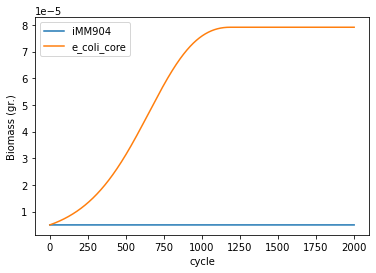

In [31]:
ax = experiment.total_biomass.plot(x = 'cycle')
ax.set_ylabel("Biomass (gr.)")
#to impose y limits:
#ax.set_ylim([0,0.0006])

To plot composition of the media, metabolites utilization or production. In the case below, only the components that are not added to the layout in unlimited amounts (“static” compounds, e.g. ammonia, phosphate, water, etc in this simulation). The selection is imposed by limiting the plot to compounds with concentration lower than 900mM.

Text(0, 0.5, 'Concentration (mmol)')

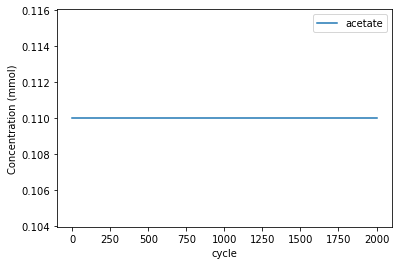

In [13]:
media = experiment.media.copy()
#to save the file with the results
media.to_csv("path_to_the_folder_and_new_file_name.csv")

media = media[media.conc_mmol<900]

fig, ax = plt.subplots()
media.groupby('metabolite').plot(x='cycle', ax =ax, y='conc_mmol')
ax.legend(('acetate','CO2', 'formate', 'glucose'))#change the molecule names according to the results
ax.set_ylabel("Concentration (mmol)")
